<a href="https://colab.research.google.com/github/niriksha-shetty/HeartPrediction-/blob/main/DSHeartDiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the dataset and display the first few rows





In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset

df = pd.read_csv('heart.csv')

print(df.info())   # Check data types and missing values
print(df.shape)    # Check number of rows and columns

# Display the first 5 rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Handle missing values appropriately.

In [2]:

print(df.isnull().sum())

df.fillna(df.median(), inplace=True)

print(df.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Check for Duplicates



In [3]:
print(f"Duplicate Rows: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)

Duplicate Rows: 1


EDA: Summary statistics

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Target Variable Distribution (Class Balance)

<ipython-input-5-b7c25b616771>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['target'], palette='coolwarm')


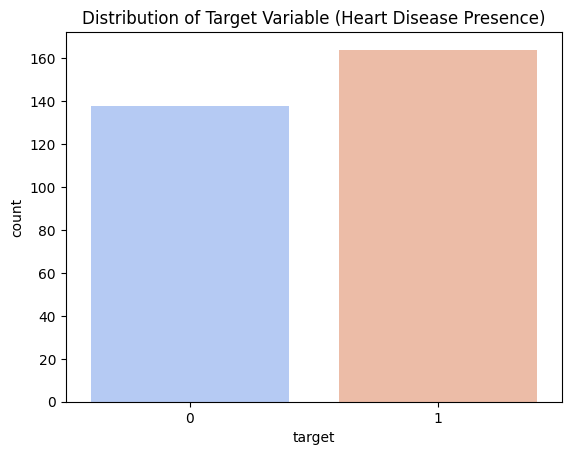

In [5]:
sns.countplot(x=df['target'], palette='coolwarm')
plt.title("Distribution of Target Variable (Heart Disease Presence)")
plt.show()

Univariate Analysis (Feature Distributions)

histogram

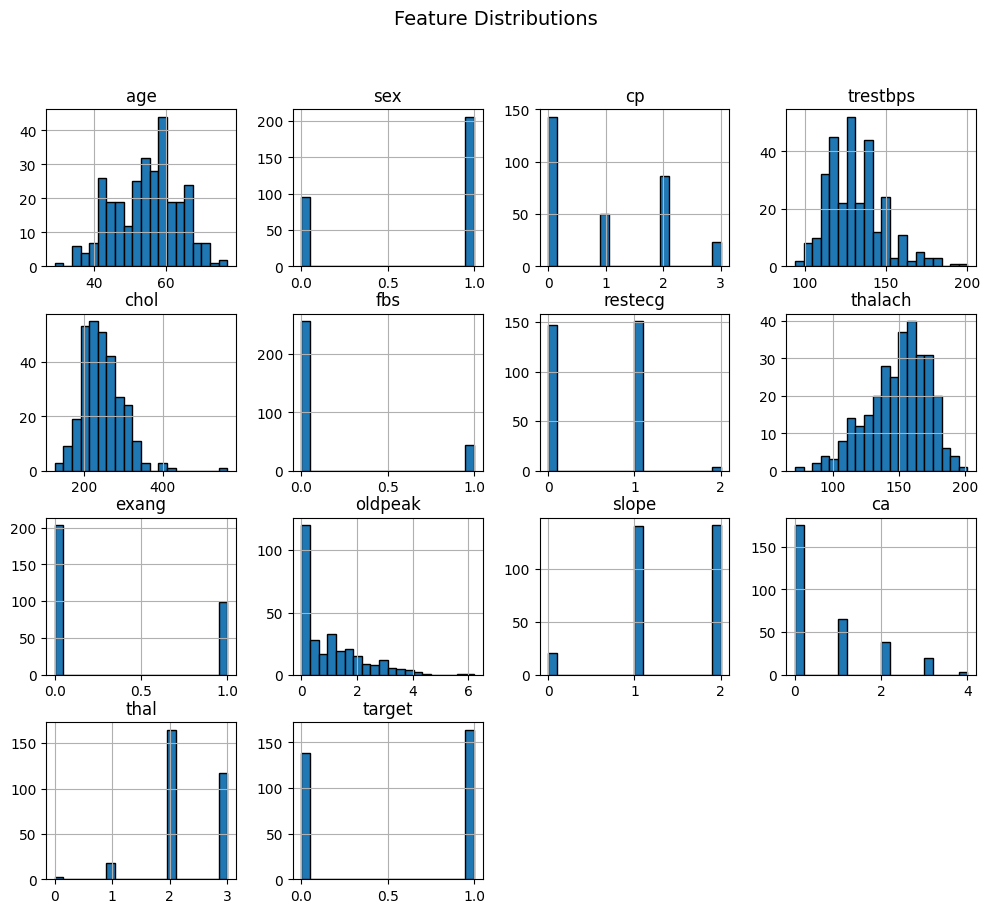

In [6]:
df.hist(figsize=(12, 10), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

KDE

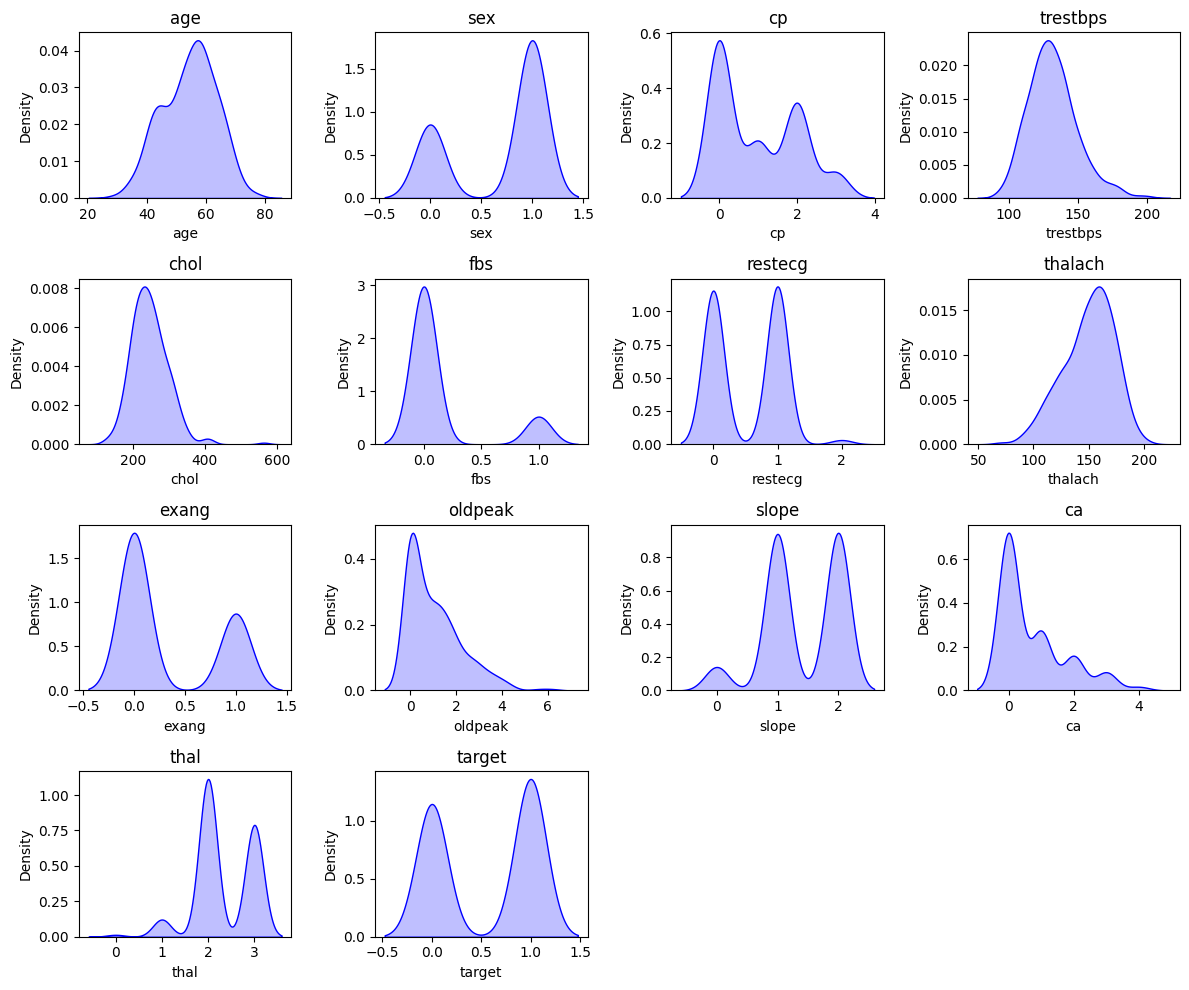

In [7]:

# Set figure size for better visualization
plt.figure(figsize=(12, 10))

# Loop through each column in df
for i, col in enumerate(df.columns):
    plt.subplot(4, 4, i + 1)  # Adjust grid layout based on number of columns
    sns.kdeplot(df[col], fill=True, color='blue')
    plt.title(f'{col}')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()



For categorical values

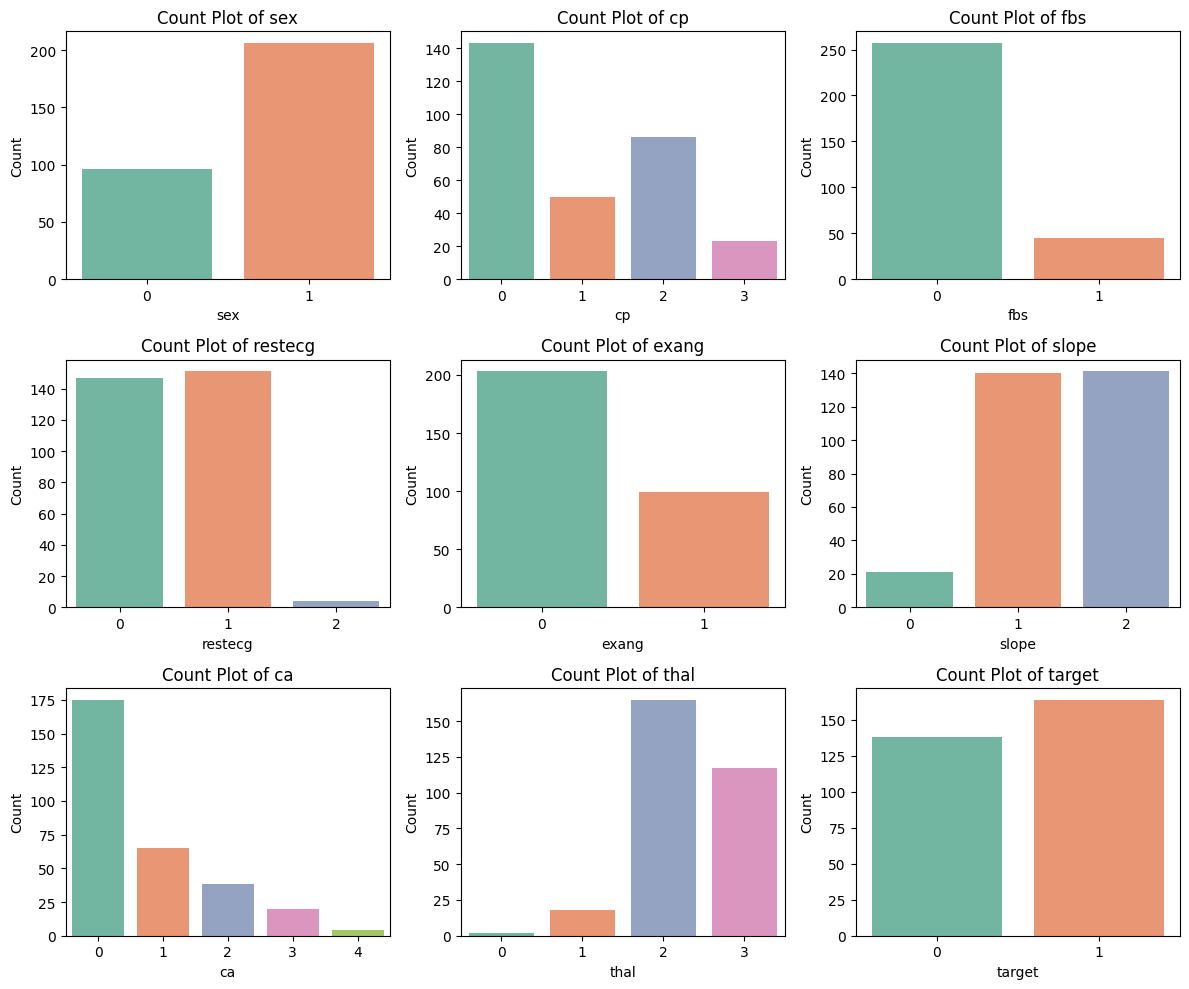

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify categorical columns
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

# Set figure size for better visualization
plt.figure(figsize=(12, 10))

# Loop through each categorical column in df
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)  # Arrange in grid format
    sns.countplot(x=df[col], hue=df[col], data=df, palette="Set2", legend=False)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


Bivariate Analysis

<ipython-input-9-f5f3b23abfbc>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="target", y=col, data=df, errorbar="sd", palette="coolwarm", legend=False)  # Bar Plot
<ipython-input-9-f5f3b23abfbc>:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["target"] == 0][col], shade=True, label="No Disease", color="blue")  # KDE for target=0
<ipython-input-9-f5f3b23abfbc>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["target"] == 1][col], shade=True, label="Disease Present", color="red")  # KDE for target=1
<ipython-input-9-f5f3b23abfbc>:14: FutureWarning: 

Passing `palette` without

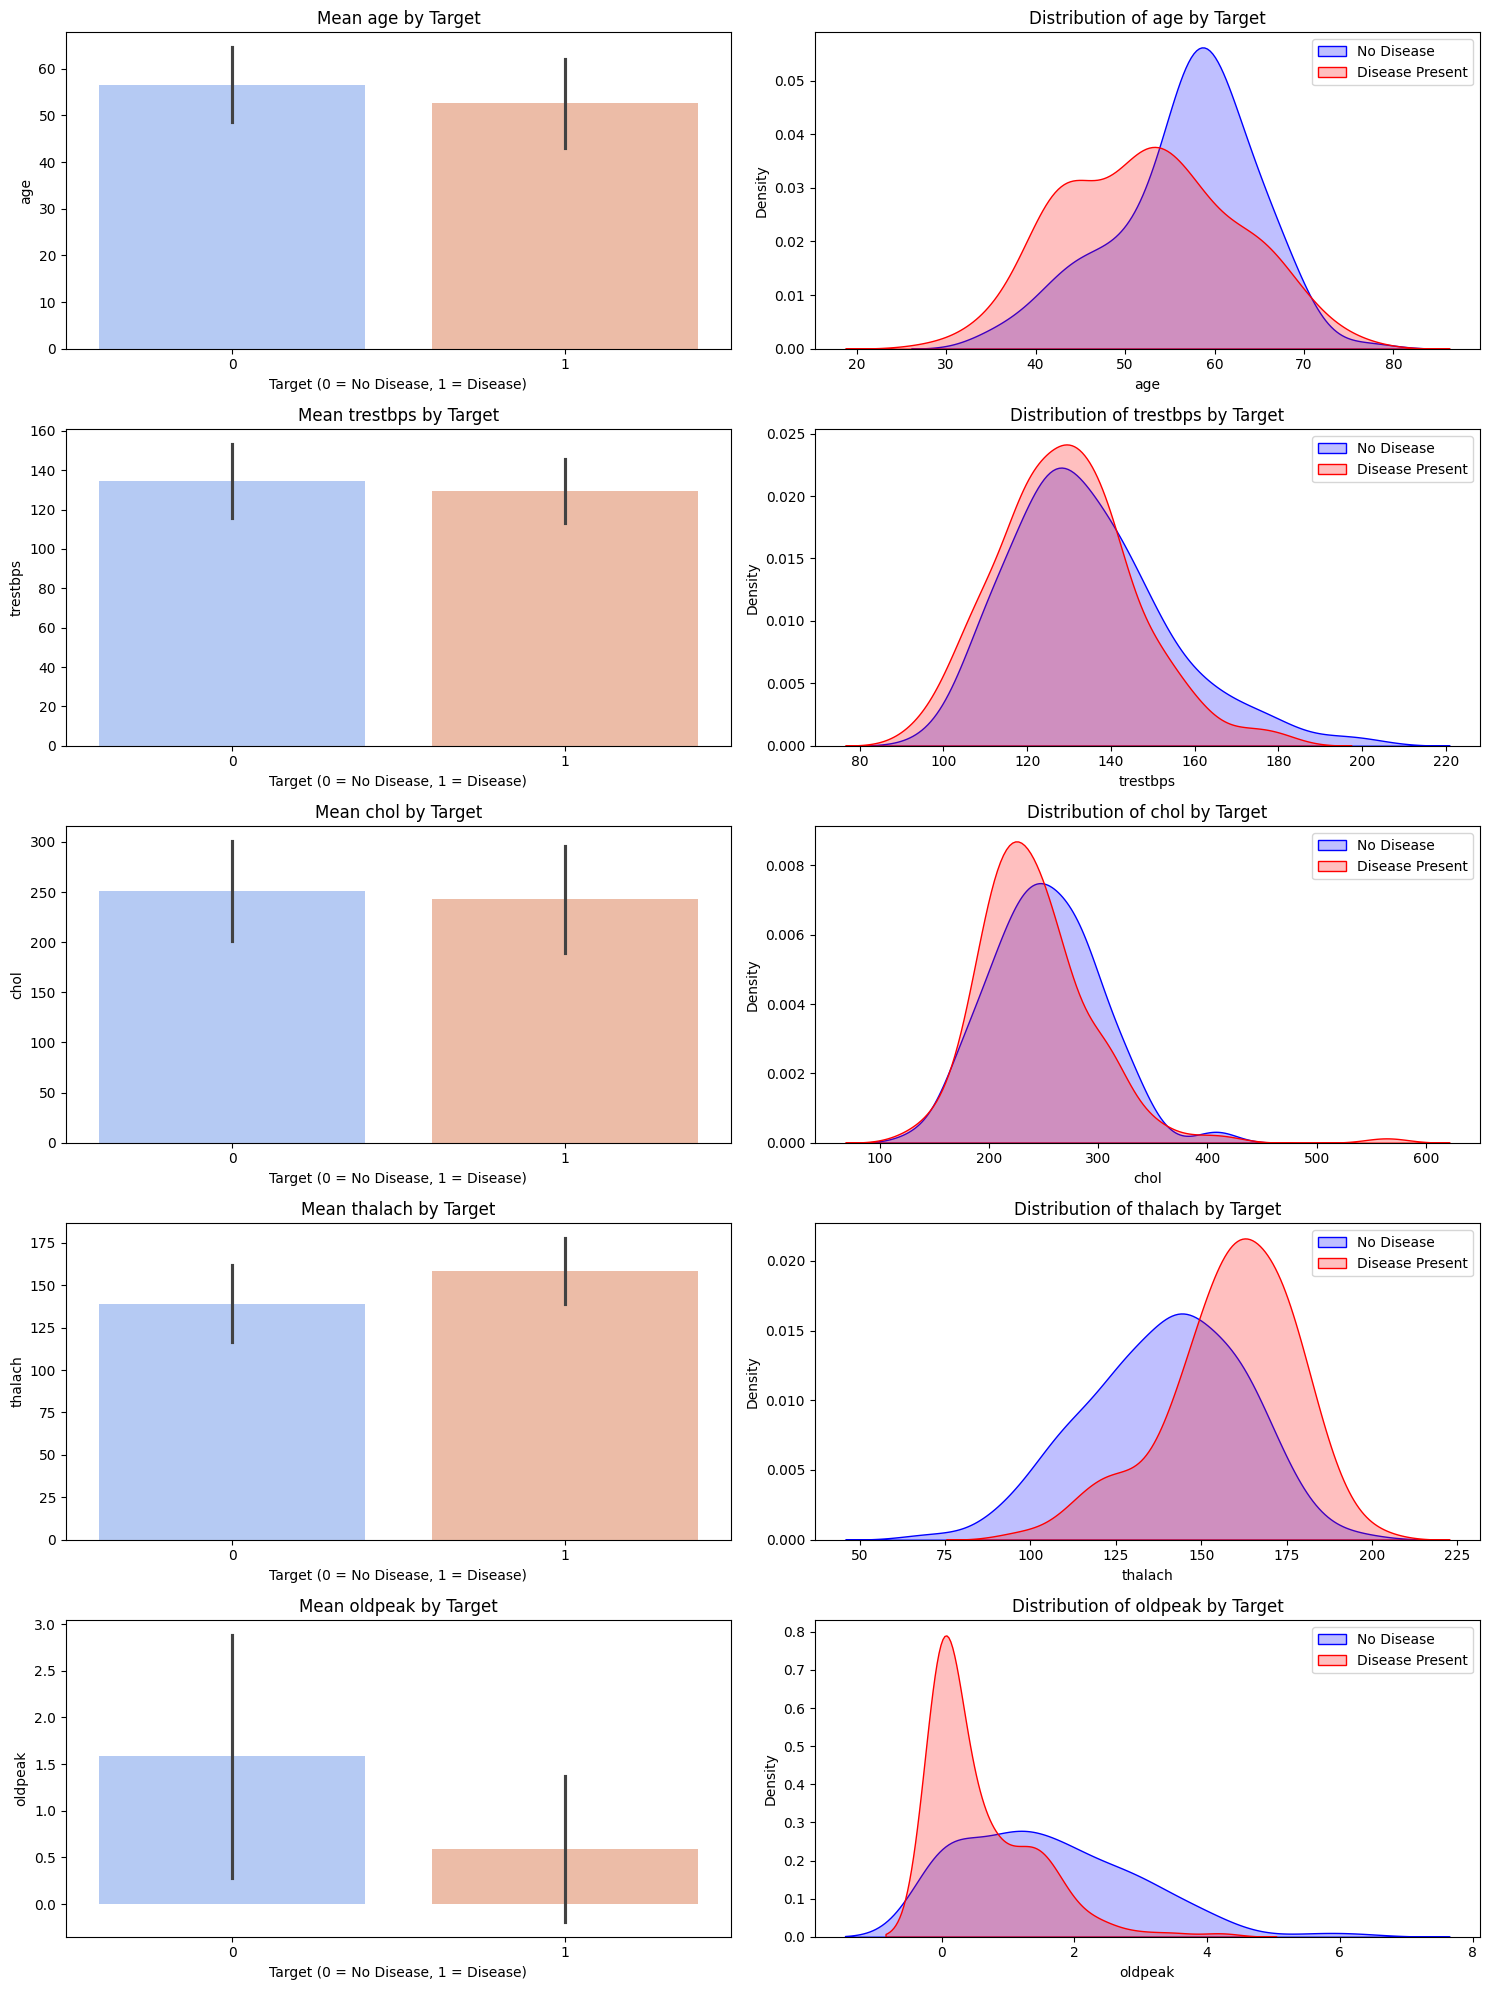

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# categorical and numerical columns
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']  # Categorical threshold
numerical_columns = ['age','trestbps','chol','thalach','oldpeak']  # Numerical features

# Set figure size
plt.figure(figsize=(15, 20))

# Bivariate Analysis for Numerical Features
for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns), 2, 2 * i + 1)
    sns.barplot(x="target", y=col, data=df, errorbar="sd", palette="coolwarm", legend=False)  # Bar Plot
    plt.title(f'Mean {col} by Target')
    plt.xlabel('Target (0 = No Disease, 1 = Disease)')
    plt.ylabel(col)

    plt.subplot(len(numerical_columns), 2, 2 * i + 2)
    sns.kdeplot(df[df["target"] == 0][col], shade=True, label="No Disease", color="blue")  # KDE for target=0
    sns.kdeplot(df[df["target"] == 1][col], shade=True, label="Disease Present", color="red")  # KDE for target=1
    plt.title(f'Distribution of {col} by Target')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()



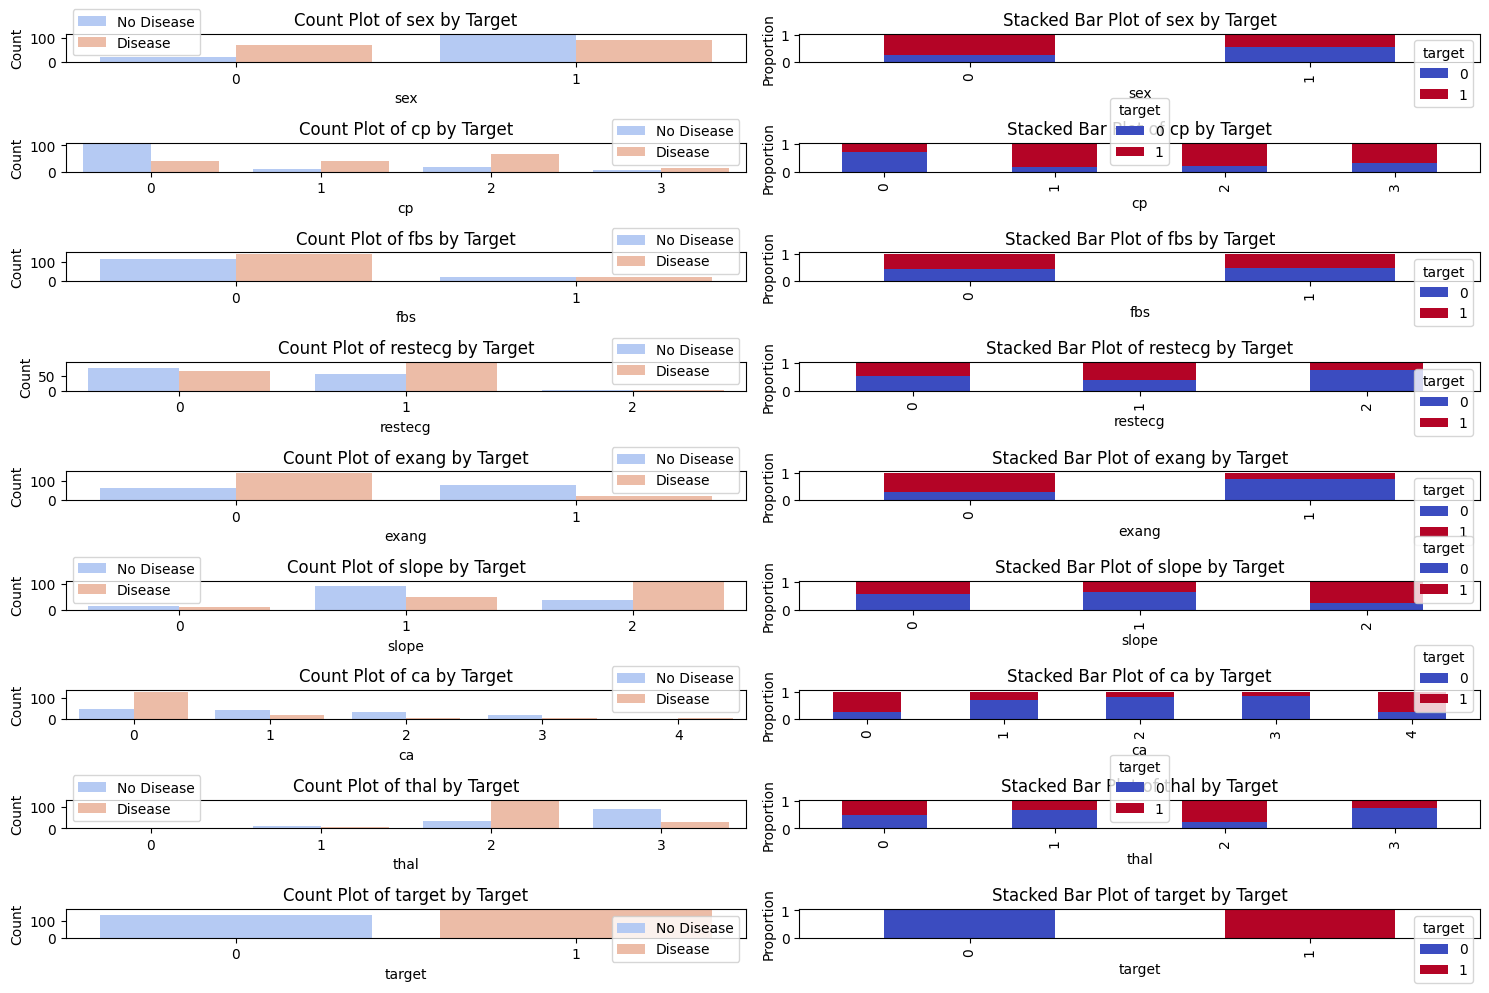

In [10]:
# Bivariate Analysis for Categorical Features
plt.figure(figsize=(15, 10))

for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols), 2, 2 * i + 1)
    sns.countplot(x=col, hue="target", data=df, palette="coolwarm")  # Count Plot
    plt.title(f'Count Plot of {col} by Target')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(["No Disease", "Disease"])

    plt.subplot(len(categorical_cols), 2, 2 * i + 2)
    cross_tab = pd.crosstab(df[col], df["target"])
    cross_tab.div(cross_tab.sum(1), axis=0).plot(kind="bar", stacked=True, colormap="coolwarm", ax=plt.gca())  # Stacked Bar Plot
    plt.title(f'Stacked Bar Plot of {col} by Target')
    plt.xlabel(col)
    plt.ylabel('Proportion')

plt.tight_layout()
plt.show()

correlation matrix

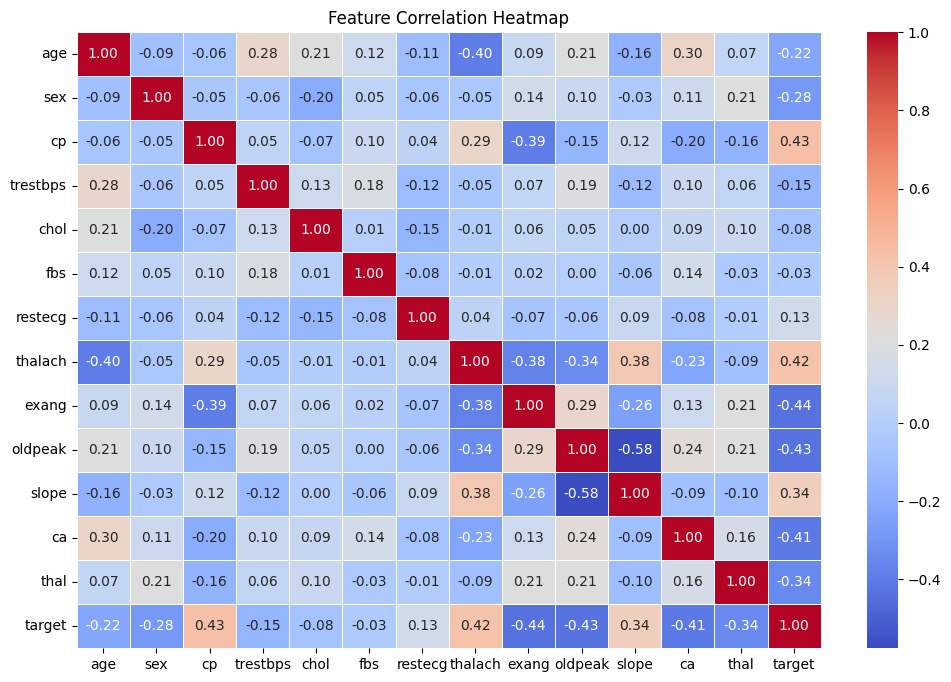

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

Outlier

box plot

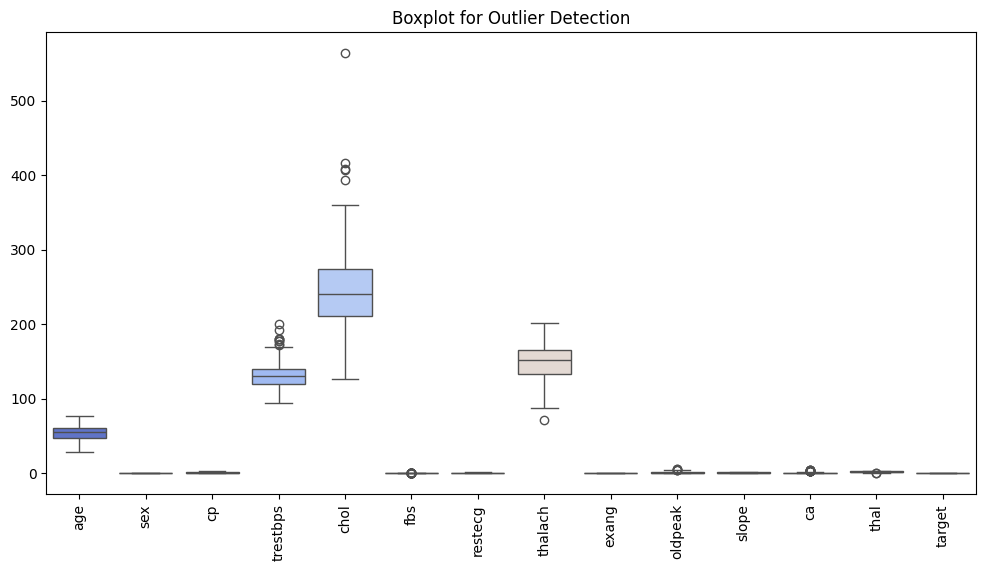

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, palette='coolwarm')
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()


IQR method

In [13]:
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified


,0
age,0
trestbps,9
chol,5
thalach,1
oldpeak,5


categorical value(optional)

In [14]:
import scipy.stats as stats
import pandas as pd


# Dictionary to store p-values
chi_square_results = {}

for col in categorical_cols:
    # Create a contingency table
    contingency_table = pd.crosstab(df[col], df['target'])

    # Perform Chi-Square test
    chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

    # Store results
    chi_square_results[col] = p_val

    print(f"Feature: {col}")
    print(f"Chi-Square Statistic: {chi2_stat}")
    print(f"Degrees of Freedom: {dof}")
    print(f"P-value: {p_val}\n")

# Display summary of significant outliers
print("\nSummary of Categorical Features with Potential Outliers:")
for feature, p_value in chi_square_results.items():
    if p_value < 0.05:
        print(f"{feature}: Significant (p={p_value}) - Possible Outlier")
    else:
        print(f"{feature}: Not Significant (p={p_value}) - No Outlier Detected")


Feature: sex
Chi-Square Statistic: 23.083879459669042
Degrees of Freedom: 1
P-value: 1.5508552054949547e-06

Feature: cp
Chi-Square Statistic: 80.97876150785669
Degrees of Freedom: 3
P-value: 1.8926838351935918e-17

Feature: fbs
Chi-Square Statistic: 0.09240835568001494
Degrees of Freedom: 1
P-value: 0.7611374700928197

Feature: restecg
Chi-Square Statistic: 9.729682311241927
Degrees of Freedom: 2
P-value: 0.007713053269318974

Feature: exang
Chi-Square Statistic: 55.45620298199192
Degrees of Freedom: 1
P-value: 9.556466486179178e-14

Feature: slope
Chi-Square Statistic: 46.889476601618135
Degrees of Freedom: 2
P-value: 6.577782760917924e-11

Feature: ca
Chi-Square Statistic: 73.68984583164412
Degrees of Freedom: 4
P-value: 3.771038067427657e-15

Feature: thal
Chi-Square Statistic: 84.61031794685029
Degrees of Freedom: 3
P-value: 3.146295138318122e-18

Feature: target
Chi-Square Statistic: 297.98357436927745
Degrees of Freedom: 1
P-value: 9.059150217293282e-67


Summary of Categorical 

Handling outlier: box-cox (numerical)

In [15]:
from scipy import stats
import numpy as np

# Apply Box-Cox transformation (Adding 1 to avoid zero values)
df['trestbps_boxcox'], lambda_trestbps = stats.boxcox(df['trestbps'] + 1)
df['chol_boxcox'], lambda_chol = stats.boxcox(df['chol'] + 1)
df['thalach_boxcox'], lambda_thalach = stats.boxcox(df['thalach'] + 1)
df['oldpeak_boxcox'], lambda_oldpeak = stats.boxcox(df['oldpeak'] + 1)

# Display the chosen lambda values for reference
print(f"Lambda values used for Box-Cox Transformation:")
print(f"trestbps: {lambda_trestbps}")
print(f"chol: {lambda_chol}")
print(f"thalach: {lambda_thalach}")
print(f"oldpeak: {lambda_oldpeak}")


Lambda values used for Box-Cox Transformation:
trestbps: -0.7203450703793414
chol: -0.10800704561215656
thalach: 2.2354155630785635
oldpeak: -0.49505530343440296


again detecting for outlier

In [16]:
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

,0
age,0
trestbps,9
chol,5
thalach,1
oldpeak,5


Handling outlier: log transformation (numerical)

In [17]:
import numpy as np

# Apply log transformation to reduce the effect of outliers
df['trestbps'] = np.log1p(df['trestbps'])  # log(1 + value) to avoid log(0) issue
df['chol'] = np.log1p(df['chol'])
df['thalach'] = np.log1p(df['thalach'])
df['oldpeak'] = np.log1p(df['oldpeak'])


Handle Categorical Variables (Encoding)

In [18]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Assuming 'cp', 'restecg', 'slope', 'thal' are the original categorical columns
categorical_cols_original = ['cp', 'restecg', 'slope', 'thal']

# Check if the columns are present in the DataFrame
categorical_cols_present = [col for col in categorical_cols_original if col in df.columns]

# One-Hot Encoding for nominal categorical variables (only for existing columns)
df = pd.get_dummies(df, columns=categorical_cols_present, drop_first=True)

# Label Encoding for binary categorical variable
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])

df.head()  # Check transformed dataset

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,thal_1,thal_2,thal_3
0,63,1,4.983607,5.455321,1,5.017280,0,1.193922,0,1,...,False,False,True,False,False,False,False,True,False,False
1,37,1,4.875197,5.525453,0,5.236442,0,1.504077,0,1,...,False,True,False,True,False,False,False,False,True,False
2,41,0,4.875197,5.323010,0,5.153292,0,0.875469,0,1,...,True,False,False,False,False,False,True,False,True,False
3,56,1,4.795791,5.468060,0,5.187386,0,0.587787,0,1,...,True,False,False,True,False,False,True,False,True,False
4,57,0,4.795791,5.872118,0,5.099866,1,0.470004,0,1,...,False,False,False,True,False,False,True,False,True,False


In [19]:
df.dtypes

,0
age,int64
sex,int64
trestbps,float64
chol,float64
fbs,int64
thalach,float64
exang,int64
oldpeak,float64
ca,int64
target,int64


correlation matrix

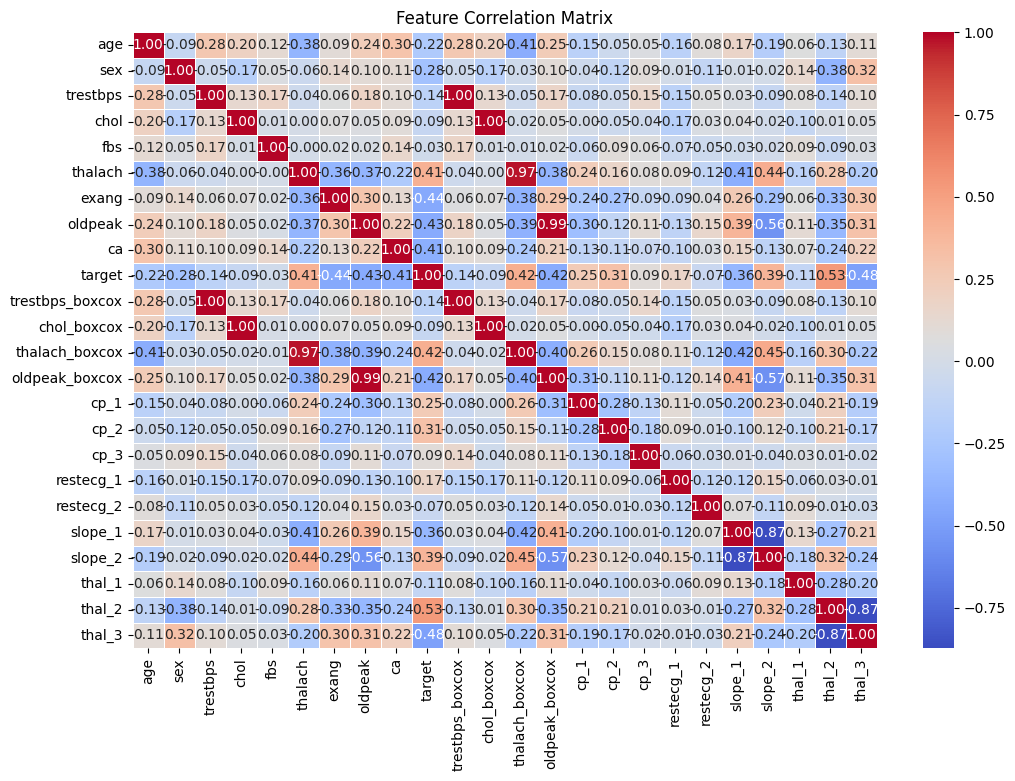

Highly Correlated Features to Remove: {'thal_3', 'thalach_boxcox', 'slope_2', 'trestbps_boxcox', 'chol_boxcox', 'oldpeak_boxcox'}


In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

# Finding highly correlated features (Threshold: 0.85)
correlated_features = set()
threshold = 0.85

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

print("Highly Correlated Features to Remove:", correlated_features)

# Dropping correlated features
df.drop(columns=correlated_features, inplace=True)


In [22]:
# Assuming the target column is named 'target' (modify if different)
y = df["target"]
X = df.drop(columns=["target"])  # Drop the target column from the feature set

print(f"Feature Set Shape: {X.shape}")
print(f"Target Variable Shape: {y.shape}")


Feature Set Shape: (302, 17)
Target Variable Shape: (302,)


In [24]:
X = X.apply(pd.to_numeric, errors='coerce')  # Convert all columns to numeric

In [26]:
print(X.dtypes)  # Check data types of features

age            int64
sex            int64
trestbps     float64
chol         float64
fbs            int64
thalach      float64
exang          int64
oldpeak      float64
ca             int64
cp_1            bool
cp_2            bool
cp_3            bool
restecg_1       bool
restecg_2       bool
slope_1         bool
thal_1          bool
thal_2          bool
dtype: object


In [27]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoding to categorical features
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])


In [34]:
print(X.dtypes)

age            int64
sex            int64
trestbps     float64
chol         float64
fbs            int64
thalach      float64
exang          int64
oldpeak      float64
ca             int64
cp_1            bool
cp_2            bool
cp_3            bool
restecg_1       bool
restecg_2       bool
slope_1         bool
thal_1          bool
thal_2          bool
dtype: object


In [35]:
print(X.isnull().sum())  # Check for missing values

# Fill missing values with the mean (or another strategy)
X.fillna(X.mean(), inplace=True)

age          0
sex          0
trestbps     0
chol         0
fbs          0
thalach      0
exang        0
oldpeak      0
ca           0
cp_1         0
cp_2         0
cp_3         0
restecg_1    0
restecg_2    0
slope_1      0
thal_1       0
thal_2       0
dtype: int64


In [33]:
for col in X.columns:
    if not pd.api.types.is_numeric_dtype(X[col]):
        print(f"⚠️ Column '{col}' is not numeric!")

In [36]:
X = X.astype(int)  # Converts all bool columns to int (0/1)

Remove Highly Correlated Features using Correlation & VIF

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute correlation matrix
corr_matrix = X.corr().abs()  # Absolute correlation values
high_corr_threshold = 0.7  # Define threshold

# Find highly correlated features
high_corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > high_corr_threshold:
            colname = corr_matrix.columns[i]
            high_corr_features.add(colname)

# Drop highly correlated features
X_uncorrelated = X.drop(columns=high_corr_features)
print(f"Removed {len(high_corr_features)} highly correlated features.")

# Compute VIF
def compute_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Remove features with high VIF (e.g., VIF > 10)
vif_threshold = 10
vif_data = compute_vif(X_uncorrelated)
high_vif_features = vif_data[vif_data["VIF"] > vif_threshold]["Feature"].tolist()
X_reduced = X_uncorrelated.drop(columns=high_vif_features)

print(f"Removed {len(high_vif_features)} high VIF features.")
print("Remaining Features:", X_reduced.columns)


Removed 0 highly correlated features.
Removed 4 high VIF features.
Remaining Features: Index(['sex', 'fbs', 'exang', 'oldpeak', 'ca', 'cp_1', 'cp_2', 'cp_3',
       'restecg_1', 'restecg_2', 'slope_1', 'thal_1', 'thal_2'],
      dtype='object')


SelectKBest with Mutual Information

In [38]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Define number of top features to keep (adjust based on dataset size)
k = 10

# Apply SelectKBest with Mutual Information
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_selected = selector.fit_transform(X_reduced, y)

# Get selected feature names
selected_features = X_reduced.columns[selector.get_support()]
print("Selected Features after Mutual Information:", list(selected_features))

# Convert X_selected back to DataFrame for training
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)


Selected Features after Mutual Information: ['fbs', 'exang', 'oldpeak', 'ca', 'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'slope_1', 'thal_2']


In [39]:
X_selected_df

,fbs,exang,oldpeak,ca,cp_1,cp_2,cp_3,restecg_1,slope_1,thal_2
0,1,0,1,0,0,0,1,0,0,0
1,0,0,1,0,0,1,0,1,0,1
2,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,1,0,0,1,0,1
4,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
297,0,1,0,0,0,0,0,1,1,0
298,0,0,0,0,0,0,1,1,1,0
299,1,0,1,2,0,0,0,1,1,0
300,0,1,0,1,0,0,0,1,1,0


Model Development & Training

Split Dataset into Training & Testing Sets

In [40]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop(columns=["target"])  # Assuming "target" is the column for disease presence
y = df["target"]

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")



Training set: (241, 17), Testing set: (61, 17)


Train models

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Initialize models
log_reg = LogisticRegression(max_iter=5000,random_state=42)
rf = RandomForestClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models
log_reg.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)


SVC(probability=True, random_state=42)

Tune hyperparameters using GridSearchCV

Logistic Regression Tuning

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid
log_reg_params = {
   "C": [0.1, 1, 10, 50, 100],  # Increase C to allow more flexibility
    "solver": ["liblinear", "saga"],  # Use solvers that handle small datasets well
    "max_iter": [1000, 5000],  # More iterations for convergence
    "class_weight": ["balanced"]
}

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Perform Grid Search
grid_log_reg = GridSearchCV(LogisticRegression(random_state=42), log_reg_params, cv=5, scoring='f1', n_jobs=-1)
grid_log_reg.fit(X_train_scaled, y_train)

# Best model
best_log_reg = grid_log_reg.best_estimator_


Random Forest Tuning

In [78]:
rf_params = {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20], "min_samples_split": [2, 5, 10]}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring="accuracy")
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_


SVM Tuning

In [79]:
svm_params = {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}

grid_svm = GridSearchCV(SVC(probability=True, random_state=42), svm_params, cv=5, scoring="accuracy")
grid_svm.fit(X_train, y_train)

best_svm = grid_svm.best_estimator_


In [63]:
import pandas as pd

# Ensure the transformed data retains column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [82]:
print("Predicted class distribution:", pd.Series(y_pred).value_counts())

Predicted class distribution: 1    39
0    22
Name: count, dtype: int64


In [84]:
print("Training class distribution:", pd.Series(y_train).value_counts())

Training class distribution: target
1    131
0    110
Name: count, dtype: int64


In [88]:
import numpy as np
print("Unique predicted values:", np.unique(y_pred_log_reg, return_counts=True))



Unique predicted values: (array([0, 1]), array([22, 39]))


evaluate models

In [92]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_prob = best_log_reg.predict_proba(X_test_scaled)[:, 1]  # Get class 1 probabilities
y_pred_log_reg = (y_pred_prob > 0.3).astype(int)   # Adjust threshold if needed

# Check performance
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_log_reg, zero_division=1))

# Function to evaluate model performance
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return [model_name, accuracy, precision, recall, f1]

# Evaluate all three models
results = []
results.append(evaluate_model(best_log_reg, X_test_scaled, y_test, "Logistic Regression"))
results.append(evaluate_model(best_rf, X_test, y_test, "Random Forest"))
results.append(evaluate_model(best_svm, X_test, y_test, "SVM"))

performance_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
print(performance_df)



              precision    recall  f1-score   support

           0       0.90      0.64      0.75        28
           1       0.76      0.94      0.84        33

    accuracy                           0.80        61
   macro avg       0.83      0.79      0.79        61
weighted avg       0.82      0.80      0.80        61

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.803279   0.800000  0.848485  0.823529
1        Random Forest  0.770492   0.756757  0.848485  0.800000
2                  SVM  0.786885   0.763158  0.878788  0.816901


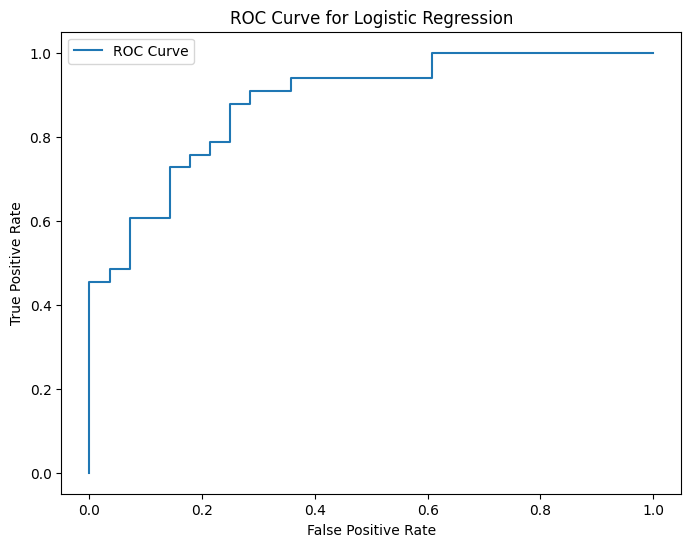

Best threshold: 0.48835761308253234
              precision    recall  f1-score   support

           0       0.81      0.75      0.78        28
           1       0.80      0.85      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [91]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Get probabilities
y_pred_prob = best_log_reg.predict_proba(X_test_scaled)[:, 1]

# Get ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend()
plt.show()

# Find the best threshold
best_threshold = thresholds[np.argmax(tpr - fpr)]
print("Best threshold:", best_threshold)

# Use this threshold in predictions
y_pred_log_reg = (y_pred_prob > best_threshold).astype(int)

# Evaluate
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_log_reg))


Evaluate models using confusion matrix, Precision Recall Curve.

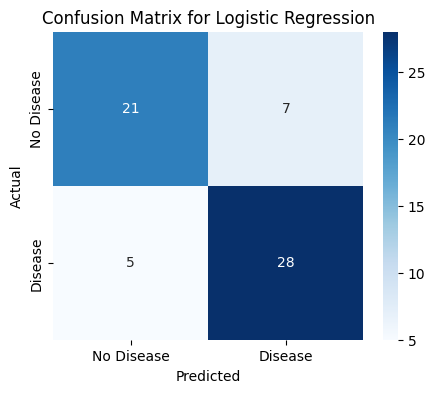

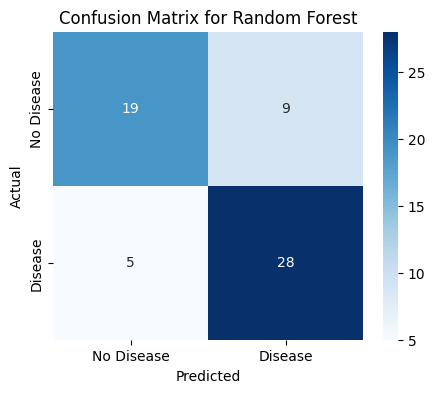

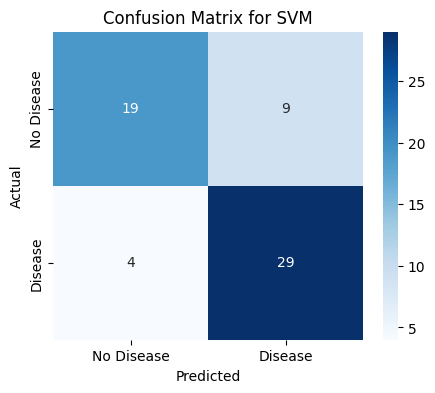

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns


# Function to plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Plot for Logistic Regression
plot_confusion_matrix(best_log_reg, X_test_scaled, y_test, "Logistic Regression")

# Plot for Random Forest
plot_confusion_matrix(best_rf, X_test, y_test, "Random Forest")

# Plot for SVM
plot_confusion_matrix(best_svm, X_test, y_test, "SVM")


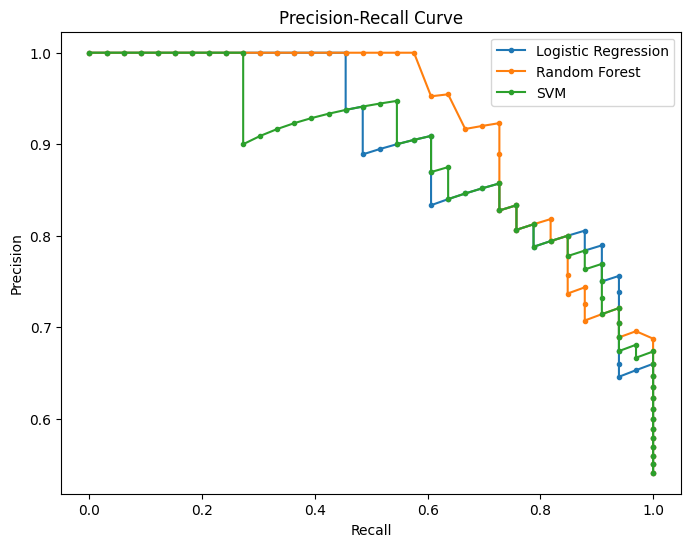

In [95]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Function to manually plot the Precision-Recall curve
def plot_pr_curve(model, X_test, y_test, model_name):
    # Get prediction scores (probabilities for classifiers that support it)
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]  # Class 1 probabilities
    else:
        y_scores = model.decision_function(X_test)  # For models like SVM

    precision, recall, _ = precision_recall_curve(y_test, y_scores)

    plt.plot(recall, precision, marker='.', label=model_name)

# Plot PR curve for all models
plt.figure(figsize=(8, 6))
plot_pr_curve(best_log_reg, X_test_scaled, y_test, "Logistic Regression")
plot_pr_curve(best_rf, X_test, y_test, "Random Forest")
plot_pr_curve(best_svm, X_test, y_test, "SVM")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


 Address Class Imbalance - SMOTE

In [96]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


Tune Hyperparameters Further

In [97]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_grid = {
    "C": np.logspace(-4, 4, 20),
    "solver": ["lbfgs", "liblinear"],
    "max_iter": [5000, 10000]
}

random_search = RandomizedSearchCV(LogisticRegression(class_weight="balanced"), param_distributions=param_grid, n_iter=10, cv=5, scoring="f1", random_state=42, n_jobs=-1)
random_search.fit(X_train_scaled, y_train)
best_log_reg = random_search.best_estimator_


Try Ensemble Models (Boosting Techniques)

In [98]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Confusion Matrix for Logistic Regression:


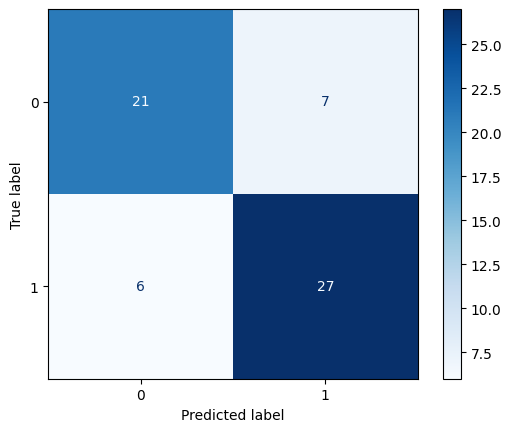

Confusion Matrix for Random Forest:


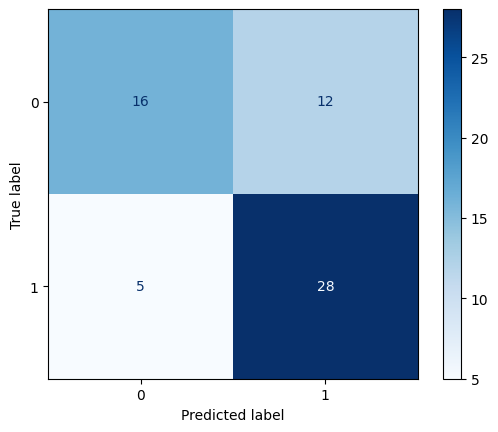

Confusion Matrix for SVM:


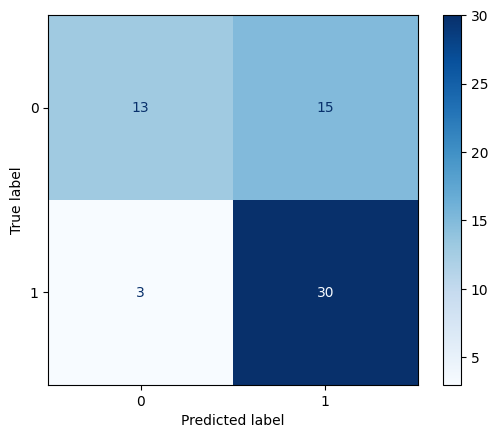

In [101]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

models = {"Logistic Regression": best_log_reg, "Random Forest": best_rf, "SVM": best_svm}

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)  # Get predictions
    cm = confusion_matrix(y_test, y_pred)  # Compute confusion matrix

    print(f"Confusion Matrix for {name}:")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.show()


In [102]:
from sklearn.metrics import classification_report

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred, zero_division=1))
    print("-" * 50)


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.78      0.75      0.76        28
           1       0.79      0.82      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61

--------------------------------------------------
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.76      0.57      0.65        28
           1       0.70      0.85      0.77        33

    accuracy                           0.72        61
   macro avg       0.73      0.71      0.71        61
weighted avg       0.73      0.72      0.71        61

--------------------------------------------------
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.81      0.46      0.59        28
           1    

In [103]:
log_reg_params = {
    "C": [0.1, 1, 5, 10],  # Regularization strength
    "solver": ["lbfgs", "liblinear"],
    "max_iter": [1000, 5000],  # More iterations for convergence
    "class_weight": ["balanced"]  # Handle class imbalance
}

rf_params = {
    "n_estimators": [100, 200],  # Number of trees
    "max_depth": [None, 10, 20],  # Tree depth
    "min_samples_split": [2, 5],  # Minimum samples to split
    "min_samples_leaf": [1, 2]  # Minimum leaf samples
}

svm_params = {
    "C": [0.1, 1, 10],  # Regularization parameter
    "kernel": ["linear", "rbf"],  # Kernel type
    "gamma": ["scale", "auto"]  # Kernel coefficient
}

from sklearn.model_selection import GridSearchCV

# Train Logistic Regression
grid_log_reg = GridSearchCV(LogisticRegression(random_state=42), log_reg_params, cv=5, scoring='f1', n_jobs=-1)
grid_log_reg.fit(X_train_scaled, y_train)
best_log_reg = grid_log_reg.best_estimator_

# Train Random Forest
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='f1', n_jobs=-1)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

# Train SVM
grid_svm = GridSearchCV(SVC(probability=True, random_state=42), svm_params, cv=5, scoring='f1', n_jobs=-1)
grid_svm.fit(X_train_scaled, y_train)
best_svm = grid_svm.best_estimator_


In [104]:
import pandas as pd
from sklearn.metrics import classification_report

# Dictionary to store evaluation metrics
results = []

# Iterate through each model and evaluate performance
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)

    # Generate classification report as a dictionary
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)

    # Extract required metrics for class 1 (disease present)
    results.append({
        "Model": name,
        "Accuracy": report["accuracy"],
        "Precision": report["1"]["precision"],
        "Recall": report["1"]["recall"],
        "F1-Score": report["1"]["f1-score"]
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the performance table
print("\nModel Performance Comparison:")
print(results_df)



Model Performance Comparison:
                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.786885   0.794118  0.818182  0.805970
1        Random Forest  0.721311   0.700000  0.848485  0.767123
2                  SVM  0.704918   0.666667  0.909091  0.769231


Save the ModeL

In [105]:
import joblib

# Save the SVM model using Joblib
joblib.dump(svm, 'svm_model.joblib')

print("Model saved successfully as svm_model.joblib!")


Model saved successfully as svm_model.joblib!


Download the Joblib File

In [106]:
from google.colab import files

files.download('svm_model.joblib')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [108]:
print(X_train.shape)  # (number_of_samples, number_of_features)


(241, 17)


In [109]:
print(X.columns)  # List of feature names

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'restecg_2', 'slope_1',
       'thal_1', 'thal_2'],
      dtype='object')
